<a href="https://colab.research.google.com/github/moulee18/NM-Project/blob/main/NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pandas as pd

In [7]:
df = pd.read_csv("E:/NaaN Mudhalvan/Disease_symptom_and_patient_profile_dataset.csv")
df.columns = df.columns.str.strip()

In [3]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [8]:
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']


In [9]:
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [10]:
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [13]:
joblib.dump(model, "random_forest_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "feature_order.pkl") 

['feature_order.pkl']

In [14]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8285714285714286
Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.87      0.82      0.85        40

    accuracy                           0.83        70
   macro avg       0.82      0.83      0.83        70
weighted avg       0.83      0.83      0.83        70



In [12]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\n Classification Report:\n", report)

Model Accuracy: 0.8428571428571429

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.87      0.85      0.86        40

    accuracy                           0.84        70
   macro avg       0.84      0.84      0.84        70
weighted avg       0.84      0.84      0.84        70



In [13]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

print(" XGBoost Accuracy:", xgb_accuracy)
print("\n XGBoost Classification Report:\n", xgb_report)


 XGBoost Accuracy: 0.7714285714285715

 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.75      0.90      0.82        40

    accuracy                           0.77        70
   macro avg       0.78      0.75      0.76        70
weighted avg       0.78      0.77      0.76        70



c:\Users\Harshavardhan J\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:47:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


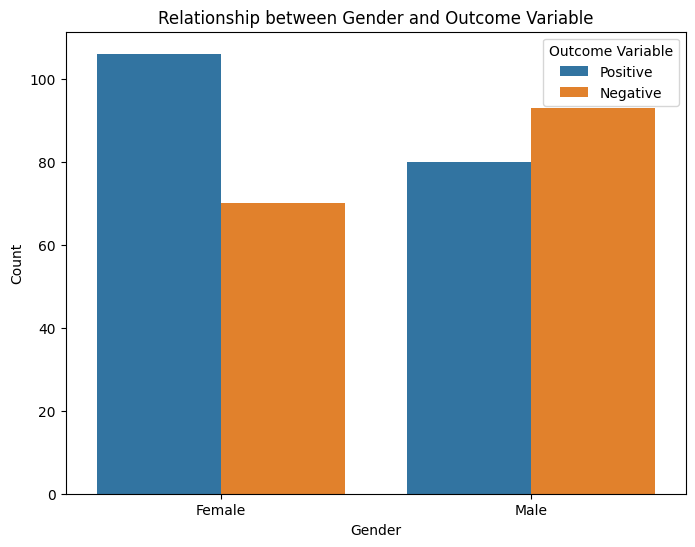

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Outcome Variable', data=df)
plt.title('Relationship between Gender and Outcome Variable')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

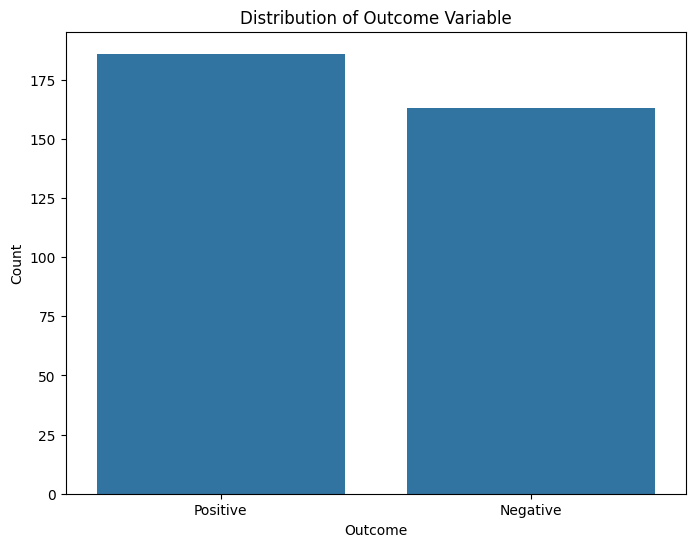

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome Variable', data=df)
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

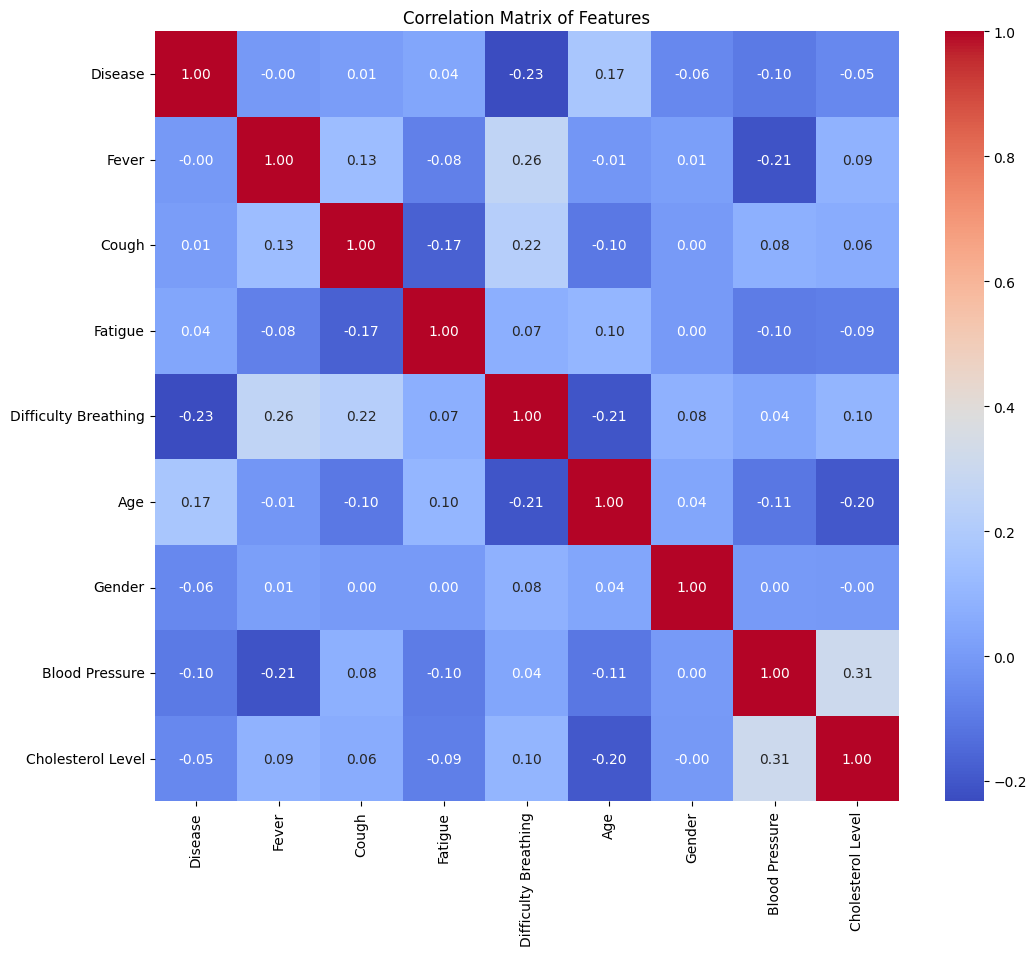

Selected features not all present in the DataFrame for pairplot.


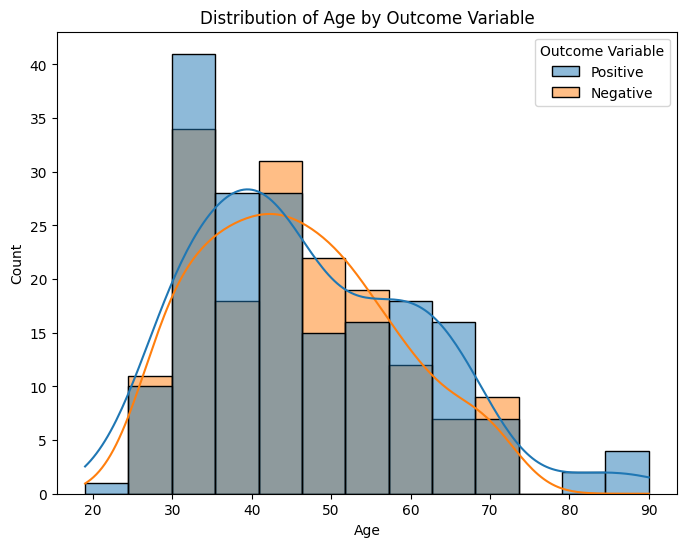

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

selected_features = ['Age', 'Severity Level', 'BMI']
if all(col in df.columns for col in selected_features):
    sns.pairplot(df[selected_features + ['Outcome Variable']], hue='Outcome Variable')
    plt.suptitle('Pairwise relationships and distributions', y=1.02)
    plt.show()
else:
    print("Selected features not all present in the DataFrame for pairplot.")

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True, hue='Outcome Variable')
plt.title('Distribution of Age by Outcome Variable')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Saving Random Forest Model

In [16]:
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']